# 🎓 Course Recommendation System
This notebook demonstrates a simple content-based recommender system using TF-IDF and cosine similarity.
It recommends similar courses based on descriptions and tags.

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
import kagglehub

path = kagglehub.dataset_download("shailx/course-recommendation-system-dataset")

print("Path to dataset files:", path)

100%|██████████| 249k/249k [00:00<00:00, 52.7MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/shailx/course-recommendation-system-dataset/versions/1


In [3]:
import os

os.listdir(path)

['udemy_course_data.csv']

In [5]:
df = pd.read_csv(path + "/udemy_course_data.csv")
df.head()

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9
2,1006314,Financial Modeling for Business Analysts and C...,https://www.udemy.com/financial-modeling-for-b...,True,45,2174,74,51,Intermediate Level,2.5 hours,2016-12-19T19:26:30Z,Business Finance,97830,2016-12-19,19:26:30Z,2016,12,19
3,1210588,Beginner to Pro - Financial Analysis in Excel ...,https://www.udemy.com/complete-excel-finance-c...,True,95,2451,11,36,All Levels,3 hours,2017-05-30T20:07:24Z,Business Finance,232845,2017-05-30,20:07:24Z,2017,5,30
4,1011058,How To Maximize Your Profits Trading Options,https://www.udemy.com/how-to-maximize-your-pro...,True,200,1276,45,26,Intermediate Level,2 hours,2016-12-13T14:57:18Z,Business Finance,255200,2016-12-13,14:57:18Z,2016,12,13


In [7]:
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3683 entries, 0 to 3682
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   course_id            3683 non-null   int64 
 1   course_title         3683 non-null   object
 2   url                  3683 non-null   object
 3   is_paid              3683 non-null   bool  
 4   price                3683 non-null   int64 
 5   num_subscribers      3683 non-null   int64 
 6   num_reviews          3683 non-null   int64 
 7   num_lectures         3683 non-null   int64 
 8   level                3683 non-null   object
 9   content_duration     3683 non-null   object
 10  published_timestamp  3683 non-null   object
 11  subject              3683 non-null   object
 12  profit               3683 non-null   int64 
 13  published_date       3683 non-null   object
 14  published_time       3682 non-null   object
 15  year                 3683 non-null   int64 
 16  month 

Index(['course_id', 'course_title', 'url', 'is_paid', 'price',
       'num_subscribers', 'num_reviews', 'num_lectures', 'level',
       'content_duration', 'published_timestamp', 'subject', 'profit',
       'published_date', 'published_time', 'year', 'month', 'day'],
      dtype='object')

In [8]:
df = df.fillna('')
df['combined'] = df['course_title'] + ' ' + df['subject'] + ' ' + df['level']
df.head(2)

,course_id,course_title,url,is_paid,price,num_subscribers,num_reviews,num_lectures,level,content_duration,published_timestamp,subject,profit,published_date,published_time,year,month,day,combined
0,1070968,Ultimate Investment Banking Course,https://www.udemy.com/ultimate-investment-bank...,True,200,2147,23,51,All Levels,1.5 hours,2017-01-18T20:58:58Z,Business Finance,429400,2017-01-18,20:58:58Z,2017,1,18,Ultimate Investment Banking Course Business Fi...
1,1113822,Complete GST Course & Certification - Grow You...,https://www.udemy.com/goods-and-services-tax/,True,75,2792,923,274,All Levels,39 hours,2017-03-09T16:34:20Z,Business Finance,209400,2017-03-09,16:34:20Z,2017,3,9,Complete GST Course & Certification - Grow You...


In [12]:
df['course_title'].sample(10).tolist()

['A Guide to Analog Synths: For the modern EDM enthusiast.',
 'WordPress Development - Themes, Plugins & Single Page Apps',
 'Ribbon Lettering: From Sketch to Wordmark',
 'Criando um poster com foto colagem digital',
 'JavaScript the Basics - JavaScript for Beginners',
 'Graphic Design: Double Your Sales With Canva',
 'Algorithmic Trading In Forex: Create Your First Forex Robot!',
 'Learn to Play Piano From a Concert Pianist - For Beginners',
 'Learn Python Django - A Hands-On Course',
 'Triple P Trading Course']

In [13]:
recommend("Learn Python Django - A Hands-On Course")


🎓 Courses similar to 'Learn Python Django - A Hands-On Course':

- Projects in Django and Python
- Coding for Entrepreneurs: Learn Python, Django, and More.
- Django For Beginners
- Learn Python and Django: Payment Processing
- Complete Python Web Course: Build 8 Python Web Apps


In [15]:
import difflib

def recommend(course_title):
    course_list = df['course_title'].tolist()
    closest_match = difflib.get_close_matches(course_title, course_list, n=1)

    if not closest_match:
        print("❌ Course not found. Please enter a valid title or keyword.")
        return

    title = closest_match[0]
    idx = df[df['course_title'] == title].index[0]
    scores = list(enumerate(similarity[idx]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:6]

    print(f"\n🎓 Courses similar to '{title}':\n")
    for i in sorted_scores:
        print("-", df.iloc[i[0]]['course_title'])


In [16]:
recommend("python")
recommend("javascript")
recommend("trading")

❌ Course not found. Please enter a valid title or keyword.

🎓 Courses similar to 'Advanced Javascript':

- JavaScript from Beginner to Advanced
- Javascript from Beginner to Advanced Level
- Learn JavaScript for Web Development
- The Advanced Web Developer Course
- JavaScript with BackboneJS and Bootstrap CSS - Advanced

🎓 Courses similar to 'Lettering':

- How to Doodle: Basics and Lettering
- Hand Lettering para Iniciantes
- Create Beveled Lettering in Adobe Illustrator
- Typographic Logos: Typography and Lettering for Logo Design
- Ribbon Lettering: From Sketch to Wordmark


In [17]:
print("Here are some course titles you can try:\n")
print(df['course_title'].sample(10).tolist())

Here are some course titles you can try:

['Learn ASP NET MVC 5 step by step', 'Practice guitar with no previous experience and become a pro', 'Fixed Income Securities', 'Removing Backgrounds From Images using Adobe Photoshop', 'Play By Ear #4: Play Song By Ear with 3 Chords Using Any Key', 'Rockabilly Guitar For Beginners', 'Drawing Anime & Manga Style', "Devenez le king de l'illustration automobile", 'Virtual Piano Lessons - A New Way To Learn Piano', 'Programming for Entrepreneurs - JavaScript']


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

vectorizer = TfidfVectorizer(stop_words='english')
vectors = vectorizer.fit_transform(df['combined'])
similarity = cosine_similarity(vectors)


In [19]:
def recommend(course_title):
    if course_title not in df['course_title'].values:
        return "Course not found. Please enter a valid course title."

    idx = df[df['course_title'] == course_title].index[0]
    scores = list(enumerate(similarity[idx]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:6]

    print(f"\n🎓 Courses similar to '{course_title}':\n")
    for i in sorted_scores:
        print("-", df.iloc[i[0]]['course_title'])


In [22]:
import difflib
import matplotlib.pyplot as plt

def plot_similar_courses(course_title):
    # Get all course titles
    course_list = df['course_title'].tolist()

    # Find closest matching course title
    closest_match = difflib.get_close_matches(course_title, course_list, n=1)

    if not closest_match:
        print("❌ Course not found. Please enter a valid or more specific title.")
        return

    title = closest_match[0]
    idx = df[df['course_title'] == title].index[0]

    # Calculate similarity scores
    scores = list(enumerate(similarity[idx]))
    sorted_scores = sorted(scores, key=lambda x: x[1], reverse=True)[1:6]

    # Extract names and values
    names = [df.iloc[i[0]]['course_title'] for i in sorted_scores]
    values = [i[1] for i in sorted_scores]

    # Plot horizontal bar chart
    plt.figure(figsize=(8,5))
    plt.barh(names, values)
    plt.xlabel("Similarity Score")
    plt.title(f"🎓 Top 5 Courses Similar to '{title}'")
    plt.gca().invert_yaxis()  # Highest at top
    plt.show()


❌ Course not found. Please enter a valid or more specific title.


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127891 (\N{GRADUATION CAP}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


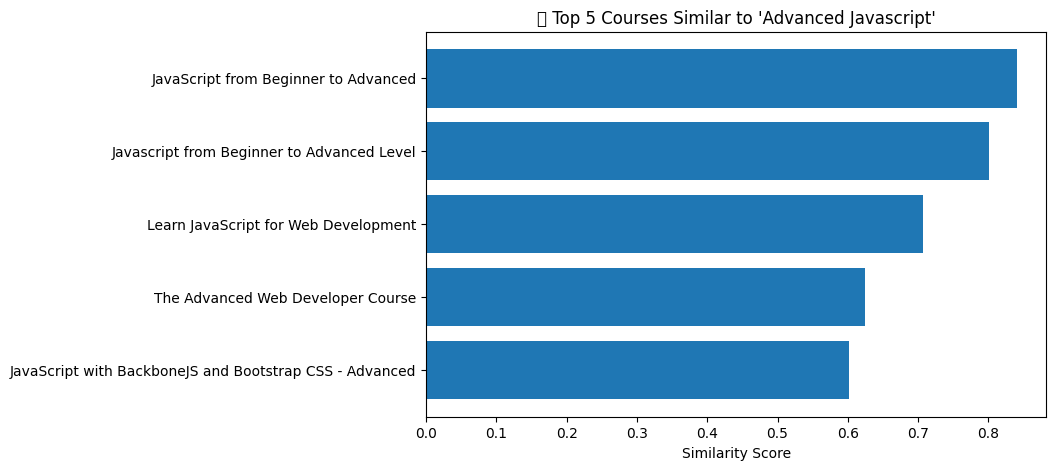

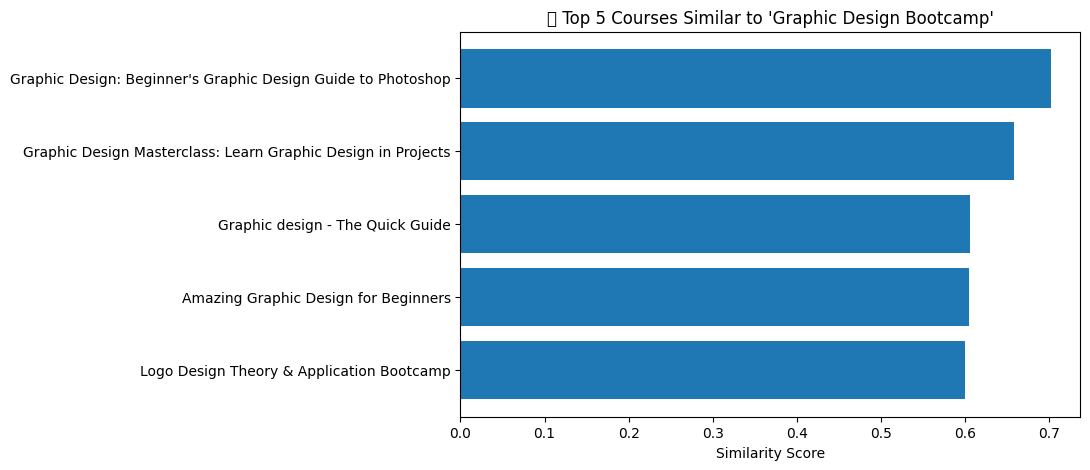

In [23]:
plot_similar_courses("python")
plot_similar_courses("javascript")
plot_similar_courses("graphic design")

In [25]:
recommend("Learn Python Django - A Hands-On Course")
recommend("JavaScript the Basics - JavaScript for Beginners")
recommend("Graphic Design: Double Your Sales With Canva")


🎓 Courses similar to 'Learn Python Django - A Hands-On Course':

- Projects in Django and Python
- Coding for Entrepreneurs: Learn Python, Django, and More.
- Django For Beginners
- Learn Python and Django: Payment Processing
- Complete Python Web Course: Build 8 Python Web Apps

🎓 Courses similar to 'JavaScript the Basics - JavaScript for Beginners':

- Javascript :basics for beginners
- Javascript for beginners
- Javascript for Beginners
- JavaScript programming: JavaScript for beginners
- Learn JavaScript for beginners

🎓 Courses similar to 'Graphic Design: Double Your Sales With Canva':

- The Complete Canva Course
- Canva: Design and Sell Your Own Professional Canva Designs
- Canva : Graphic Design Theory Volume1
- Canva : Graphic Design Theory Volume2
- Graphic Design: Beginner's Graphic Design Guide to Photoshop


## ✅ Conclusion
- Implemented a simple content-based recommender system using TF-IDF and cosine similarity.
- The system effectively finds similar courses based on text descriptions.
- This can be extended using collaborative filtering or deep learning for advanced applications.

## 📚 References
- Dataset sourced from Kaggle
- Scikit-learn documentation for TF-IDF Vectorizer
- Google Colab documentation